In [158]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [159]:
image_path = 'tf2.jpg' 
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Unable to load image.")
    exit()

In [160]:
shader = [' ', '.', ';', 'e', 'o', 'K', 'P', '0', '?', '@']

ascii_patterns = {
    ' ': np.array([[0]*8]*8, dtype=np.uint8),
    '.': np.where(np.array([[0]*8]*6 + [[0]*4 + [255]*1 + [0]*3] + [[0]*8], dtype=np.uint8) == 0, 255, 0),
    ';': np.where(np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 255, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 255, 0, 0, 0],
                            [0, 0, 0, 0, 255, 0, 0, 0],
                            [0, 0, 0, 255, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0]
                        ], dtype=np.uint8) == 0, 255, 0),
    'e': np.where(np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 255, 255, 255, 255, 0, 0],
                            [0, 255, 0, 0, 0, 0, 255, 0],
                            [0, 255, 0, 0, 0, 0, 255, 0],
                            [0, 255, 255, 255, 255, 255, 0, 0],
                            [0, 255, 0, 0, 0, 0, 0, 0],
                            [0, 0, 255, 255, 255, 255, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0]], dtype=np.uint8) == 0, 255, 0),
    'o': np.where(np.array([[0, 0, 255, 255, 255, 0, 0, 0],
                            [0, 255, 0, 0, 0, 255, 0, 0],
                            [255, 0, 0, 0, 0, 0, 255, 0],
                            [255, 0, 0, 0, 0, 0, 255, 0],
                            [255, 0, 0, 0, 0, 0, 255, 0],
                            [0, 255, 0, 0, 0, 255, 0, 0],
                            [0, 0, 255, 255, 255, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0]], dtype=np.uint8) == 0, 255, 0),
    'K': np.where(np.array([[255, 0, 0, 0, 255, 0, 255, 0],
                            [255, 0, 0, 0, 255, 0, 255, 0],
                            [255, 0, 0, 255, 0, 255, 0, 0],
                            [255, 0, 255, 0, 255, 0, 0, 0],
                            [255, 255, 0, 255, 0, 0, 0, 0],
                            [255, 0, 255, 0, 255, 0, 0, 0],
                            [255, 0, 0, 255, 0, 255, 0, 0],
                            [255, 0, 0, 0, 255, 0, 255, 0]], dtype=np.uint8) == 0, 255, 0),
    'P': np.where(np.array([[255]*7 + [0]] + [[255, 0, 0, 0, 0, 0, 255, 0]]*3 + [[255]*7 + [0]] + [[255, 0, 0, 0, 0, 0, 0, 0]]*3, dtype=np.uint8) == 0, 255, 0),
    '0': np.where(np.array([[0]*2 + [255]*4 + [0]*2] + [[0] + [255] + [0]*4 + [255] + [0]]*6 + [[0]*2 + [255]*4 + [0]*2], dtype=np.uint8) == 0, 255, 0),
    '?': np.where(np.array([[0, 255, 255, 255, 255, 255, 255, 0],
                            [255, 255, 0, 0, 0, 255, 255, 255],
                            [255, 0, 0, 0, 0, 0, 255, 255],
                            [0, 0, 0, 0, 0, 255, 255, 0],
                            [0, 0, 0, 0, 255, 255, 0, 0],
                            [0, 0, 0, 0, 255, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 255, 0, 0, 0]], dtype=np.uint8) == 0, 255, 0),
    '@': np.where(np.array([[255]*8] + [[255] + [0]*6 + [255]]*2 + [[255] + [0] + [255]*6] + [[255] + [0] + [255] + [0]*4 + [255]]+ [[255] + [0] + [255]*6]  + [[255] + [0]*7] + [[255]*8], dtype=np.uint8) == 0, 255, 0)
}


In [161]:
def quantize_image(image, levels=10):
    quantized = np.floor(image / 255 * (levels - 1)).astype(np.uint8)
    return quantized


def resize_image(image, block_size):
    height, width = image.shape
    new_height = height // block_size
    new_width = width // block_size
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)
    return resized_image

def image_to_ascii_art(image, shader, block_size, patterns):
    height, width = image.shape
    ascii_art_image = np.zeros((height * block_size, width * block_size), dtype=np.uint8)
    for i in range(height):
        for j in range(width):
            char = shader[image[i, j]]
            ascii_art_image[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size] = patterns[char]
    return ascii_art_image



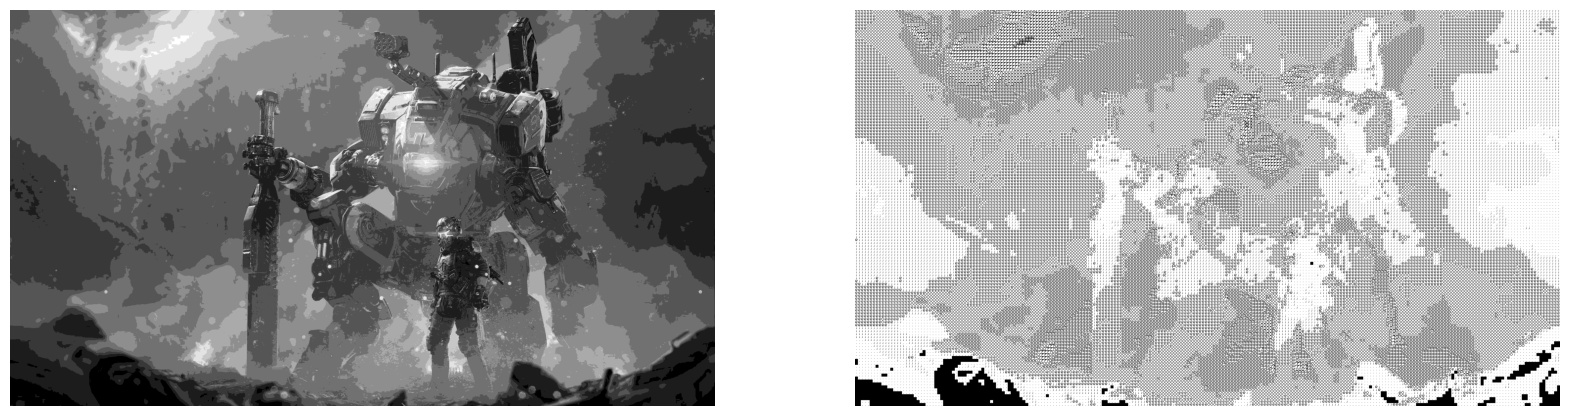

In [162]:
quantized_image = quantize_image(image, levels=10)

block_size = 8
resized_image = resize_image(quantized_image, block_size)

ascii_art_image = image_to_ascii_art(resized_image, shader, block_size, ascii_patterns)
plt.imsave('ascii_art.png', ascii_art_image, cmap='gray')
plt.imsave('quantized.png', quantized_image, cmap='gray')

# show quantized and ascii side by side 
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(quantized_image, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(ascii_art_image, cmap='gray')
plt.axis('off')
plt.show()

In [166]:
input_video_path = 'tf2vide.mp4' 
output_video_path = 'ascii_video2.mp4'
video_capture = cv2.VideoCapture(input_video_path)

if not video_capture.isOpened():
    print("Error: Unable to open video.")
    exit()

fps = video_capture.get(cv2.CAP_PROP_FPS)
frame_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # 'X264' could be an alternative
video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height), isColor=False)

block_size = 8
while True:
    ret, frame = video_capture.read()
    if not ret:
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    quantized_frame = quantize_image(gray_frame, levels=10)

    resized_frame = resize_image(quantized_frame, block_size)
    ascii_art_frame = image_to_ascii_art(resized_frame, shader, block_size, ascii_patterns)
    video_writer.write(ascii_art_frame)

video_capture.release()
video_writer.release()